In [107]:
# !pip uninstall tensorflow

In [108]:
# !pip install tensorflow==2.4.0

In [109]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
tf.__version__

'2.9.2'

In [113]:
df = pd.read_csv("feed.csv")
df

,created_at,entry_id,Temperature (degC),Humidity (%),Pressure (hPa),Air Quality (Ohm),Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2022-11-02 01:00:00,1,22.79945,52.08028,1018.10999,170858,NaN,NaN,NaN
1,2022-11-02 01:10:00,2,21.54753,49.60780,1018.03003,234857,NaN,NaN,NaN
2,2022-11-02 01:20:00,3,20.93671,48.81311,1017.75000,238414,NaN,NaN,NaN
3,2022-11-02 01:30:00,4,19.51950,51.14481,1017.65997,255752,NaN,NaN,NaN
4,2022-11-02 01:40:00,5,19.29297,52.39877,1017.48999,244769,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
425731,2030-12-06 12:10:00,425732,24.41549,44.73242,1011.44000,227424,NaN,NaN,NaN
425732,2030-12-06 12:20:00,425733,24.61931,43.59546,1011.50000,229000,NaN,NaN,NaN
425733,2030-12-06 12:30:00,425734,24.64833,43.58143,1011.32001,225716,NaN,NaN,NaN
425734,2030-12-06 12:40:00,425735,24.75088,42.18751,1010.84998,233036,NaN,NaN,NaN


## Time Steps used to train model

In [115]:
df = df[::6]
df

,created_at,entry_id,Temperature (degC),Humidity (%),Pressure (hPa),Air Quality (Ohm),Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2022-11-02 01:00:00,1,22.79945,52.08028,1018.10999,170858,NaN,NaN,NaN
6,2022-11-02 02:00:00,7,19.17245,53.46775,1017.32001,235359,NaN,NaN,NaN
12,2022-11-02 03:00:00,13,19.33430,52.61555,1016.89001,229636,NaN,NaN,NaN
18,2022-11-02 04:00:00,19,19.81102,52.53099,1016.73999,220595,NaN,NaN,NaN
24,2022-11-02 05:00:00,25,19.65832,53.53024,1016.76001,224338,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
425706,2030-12-06 08:00:00,425707,25.43744,42.04075,1013.31000,223579,NaN,NaN,NaN
425712,2030-12-06 09:00:00,425713,24.72564,44.19883,1013.46997,225408,NaN,NaN,NaN
425718,2030-12-06 10:00:00,425719,24.74930,44.03909,1012.89001,222675,NaN,NaN,NaN
425724,2030-12-06 11:00:00,425725,25.10709,41.24293,1011.96002,233860,NaN,NaN,NaN


In [116]:
df.index = pd.to_datetime(df['created_at'], format='%Y.%m.%d %H:%M:%S')
df[:26]

,created_at,entry_id,Temperature (degC),Humidity (%),Pressure (hPa),Air Quality (Ohm),Unnamed: 6,Unnamed: 7,Unnamed: 8
created_at,,,,,,,,,
2022-11-02 01:00:00,2022-11-02 01:00:00,1,22.79945,52.08028,1018.10999,170858,NaN,NaN,NaN
2022-11-02 02:00:00,2022-11-02 02:00:00,7,19.17245,53.46775,1017.32001,235359,NaN,NaN,NaN
2022-11-02 03:00:00,2022-11-02 03:00:00,13,19.33430,52.61555,1016.89001,229636,NaN,NaN,NaN
2022-11-02 04:00:00,2022-11-02 04:00:00,19,19.81102,52.53099,1016.73999,220595,NaN,NaN,NaN
2022-11-02 05:00:00,2022-11-02 05:00:00,25,19.65832,53.53024,1016.76001,224338,NaN,NaN,NaN
2022-11-02 06:00:00,2022-11-02 06:00:00,31,19.96593,53.27819,1017.02002,224490,NaN,NaN,NaN
2022-11-02 07:00:00,2022-11-02 07:00:00,37,25.91166,40.13583,1017.42999,197292,NaN,NaN,NaN
2022-11-02 08:00:00,2022-11-02 08:00:00,43,24.30190,43.46661,1017.22998,224795,NaN,NaN,NaN
2022-11-02 09:00:00,2022-11-02 09:00:00,49,25.29325,42.14506,1017.09003,218843,NaN,NaN,NaN


In [117]:
# converting string date to seconds

timestamp_s = df.index.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Text(0.5, 1.0, 'Time of day signal')

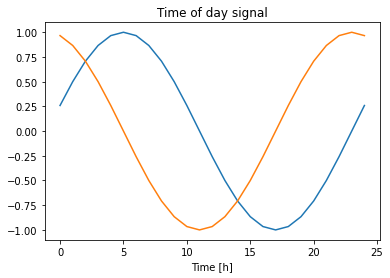

In [118]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

## Standardising training data

In [119]:
temp = df['Temperature (degC)']

temp_avg = temp.mean()
temp_std = temp.std()

temp = (temp - temp_avg)/temp_std

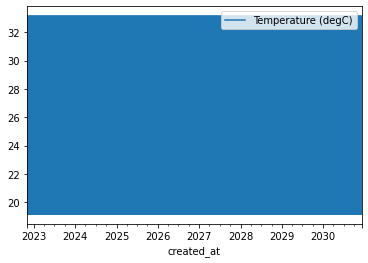

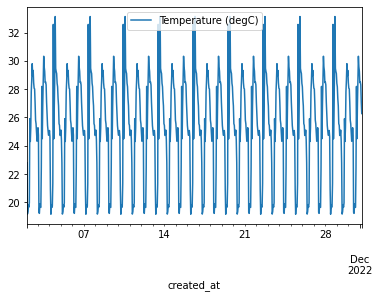

In [120]:


plot_cols = ['Temperature (degC)']
plot_features = df[plot_cols]
plot_features.index = df.index # date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:700]
plot_features.index = df.index[:700]
_ = plot_features.plot(subplots=True)

In [121]:
df['Temperature (degC)'].describe().transpose()

count    70956.000000
mean        25.319663
std          3.562352
min         19.163310
25%         24.301900
50%         25.428290
75%         28.300790
max         33.130350
Name: Temperature (degC), dtype: float64

## Model Shape

In [122]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [123]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70951, 5, 1), (70951,))

## Data Splitting and Model Training

In [124]:
n = len(X1)

X_train1, y_train1 = X1[0:int(n*0.7)].astype(np.float32), y1[0:int(n*0.7)].astype(np.float32)
X_val1, y_val1 = X1[int(n*0.7):int(n*0.9)].astype(np.float32), y1[int(n*0.7):int(n*0.9)].astype(np.float32)
X_test1, y_test1 = X1[int(n*0.9):].astype(np.float32), y1[int(n*0.9):].astype(np.float32)
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

n

70951

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# MLP model

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu', input_dim=WINDOW_SIZE),
    # tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])



# model1.summary()

In [127]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [128]:
history = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.3447 - root_mean_squared_error: 0.5871 - val_loss: 0.1751 - val_root_mean_squared_error: 0.4184
Epoch 2/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.1408 - root_mean_squared_error: 0.3752 - val_loss: 0.1181 - val_root_mean_squared_error: 0.3437
Epoch 3/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.1061 - root_mean_squared_error: 0.3257 - val_loss: 0.0958 - val_root_mean_squared_error: 0.3096
Epoch 4/20
1553/1553 [==============================] - 4s 3ms/step - loss: 0.0879 - root_mean_squared_error: 0.2964 - val_loss: 0.0809 - val_root_mean_squared_error: 0.2845
Epoch 5/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.0753 - root_mean_squared_error: 0.2743 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2640
Epoch 6/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.0647 - root_mean_squared_error: 0.2544 - val_loss: 0

In [129]:
# collecting validation and testing results

val_performance = {}
performance = {}
train_performance = {}

val_performance['MLP 1h'] = model1.evaluate(X_val1, y_val1)
performance['MLP 1h'] = model1.evaluate(X_test1, y_test1)


222/222 [==============================] - 0s 2ms/step - loss: 0.0092 - root_mean_squared_error: 0.0957


{'MLP 1h': [0.009186048060655594, 0.09584387391805649]}

In [130]:
performance

{'MLP 1h': [0.00916055403649807, 0.09571078419685364]}

In [131]:
print(history.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


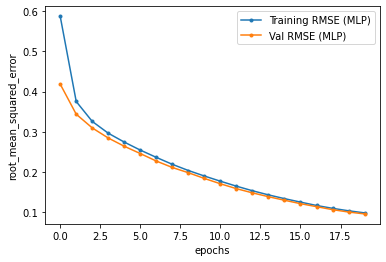

In [132]:
# validating trained model

plt.plot(history.history['root_mean_squared_error'], '.-', label='Training RMSE (MLP)')
plt.plot(history.history['val_root_mean_squared_error'], '.-', label='Val RMSE (MLP)')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [133]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [134]:
# training predictions vs actual temperature

train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1553/1553 [==============================] - 2s 1ms/step


,Train Predictions,Actuals
0,-1.493226,-1.502865
1,0.010962,0.166181
2,-0.291085,-0.285700
3,-0.007257,-0.007415
4,0.671724,0.701682
...,...,...
49660,-1.529354,-1.691774
49661,-1.714544,-1.711435
49662,-1.454379,-1.519250
49663,-1.560055,-1.588064


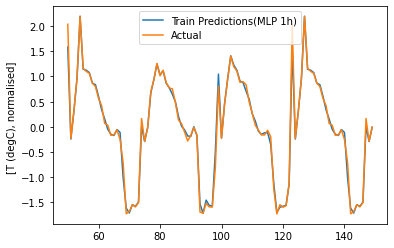

In [135]:
plt.plot(train_results['Train Predictions'][50:150], label='Train Predictions(MLP 1h)')
plt.plot(train_results['Actuals'][50:150], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [136]:
# validation predictions vs actual temperature

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

444/444 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,-0.490008,-0.802580
1,1.046742,0.806638
2,-0.218067,-0.229989
3,0.462509,0.451378
4,0.954922,0.945608
...,...,...
14185,-1.556035,-1.566101
14186,-1.139314,-1.117608
14187,1.583405,2.036404
14188,-0.242123,-0.232912


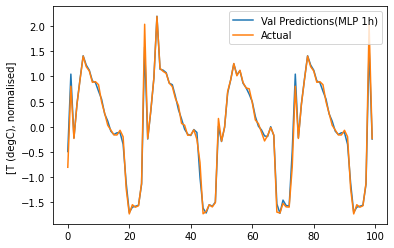

In [137]:
plt.plot(val_results['Val Predictions'][:100], label='Val Predictions(MLP 1h)')
plt.plot(val_results['Actuals'][:100], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [138]:
# test predictions vs actual temperature

test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

222/222 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
0,0.966119,0.967930
1,2.195526,2.192565
2,1.143753,1.163321
3,1.124963,1.101940
4,1.076379,1.061994
...,...,...
7091,-0.047294,0.033062
7092,-0.145371,-0.166750
7093,-0.171514,-0.160109
7094,-0.053403,-0.059672


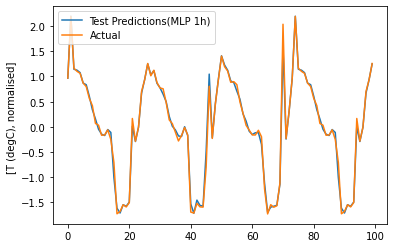

In [139]:
plt.plot(test_results['Test Predictions'][:100], label='Test Predictions(MLP 1h)')
plt.plot(test_results['Actuals'][:100], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [140]:
# CNN Model

conv_model = Sequential()
conv_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(WINDOW_SIZE, 1)))
# conv_model.add(MaxPooling1D(pool_size=2))
conv_model.add(Flatten())
conv_model.add(Dense(50, activation='relu'))
conv_model.add(Dense(1))

conv_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                12850     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 13,093
Trainable params: 13,093
Non-trainable params: 0
_________________________________________________________________


In [141]:
conv_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [142]:
history = conv_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
1553/1553 [==============================] - 6s 3ms/step - loss: 0.2074 - root_mean_squared_error: 0.4554 - val_loss: 0.0866 - val_root_mean_squared_error: 0.2942
Epoch 2/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.0708 - root_mean_squared_error: 0.2661 - val_loss: 0.0587 - val_root_mean_squared_error: 0.2422
Epoch 3/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.0480 - root_mean_squared_error: 0.2191 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1925
Epoch 4/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.0291 - root_mean_squared_error: 0.1705 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1473
Epoch 5/20
1553/1553 [==============================] - 5s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.1302 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1130
Epoch 6/20
1538/1553 [============================>.] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.1000

1553/1553 [==============================] - 5s 3ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 7/20
1537/1553 [============================>.] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0789

1553/1553 [==============================] - 5s 3ms/step - loss: 0.0062 - root_mean_squared_error: 0.0789 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 8/20
1534/1553 [============================>.] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0651

1553/1553 [==============================] - 5s 3ms/step - loss: 0.0042 - root_mean_squared_error: 0.0650 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0580
Epoch 9/20
1553/1553 [==============================] - 4s 3ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0597
Epoch 10/20
1537/1553 [============================>.] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472

1553/1553 [==============================] - 5s 3ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 11/20
1537/1553 [============================>.] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0408

1553/1553 [==============================] - 5s 3ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0395
Epoch 12/20
1546/1553 [============================>.] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0351

1553/1553 [==============================] - 8s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0351 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0344
Epoch 13/20
1535/1553 [============================>.] - ETA: 0s - loss: 9.7383e-04 - root_mean_squared_error: 0.0312

1553/1553 [==============================] - 5s 3ms/step - loss: 9.7273e-04 - root_mean_squared_error: 0.0312 - val_loss: 7.9424e-04 - val_root_mean_squared_error: 0.0282
Epoch 14/20
1547/1553 [============================>.] - ETA: 0s - loss: 6.9508e-04 - root_mean_squared_error: 0.0264

1553/1553 [==============================] - 5s 3ms/step - loss: 6.9419e-04 - root_mean_squared_error: 0.0263 - val_loss: 5.1553e-04 - val_root_mean_squared_error: 0.0227
Epoch 15/20
1552/1553 [============================>.] - ETA: 0s - loss: 4.9277e-04 - root_mean_squared_error: 0.0222

1553/1553 [==============================] - 5s 3ms/step - loss: 4.9277e-04 - root_mean_squared_error: 0.0222 - val_loss: 4.9995e-04 - val_root_mean_squared_error: 0.0224
Epoch 16/20
1541/1553 [============================>.] - ETA: 0s - loss: 3.4205e-04 - root_mean_squared_error: 0.0185

1553/1553 [==============================] - 5s 4ms/step - loss: 3.4138e-04 - root_mean_squared_error: 0.0185 - val_loss: 2.7852e-04 - val_root_mean_squared_error: 0.0167
Epoch 17/20
1538/1553 [============================>.] - ETA: 0s - loss: 2.2131e-04 - root_mean_squared_error: 0.0149

1553/1553 [==============================] - 5s 3ms/step - loss: 2.2050e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.3749e-04 - val_root_mean_squared_error: 0.0154
Epoch 18/20
1544/1553 [============================>.] - ETA: 0s - loss: 1.3522e-04 - root_mean_squared_error: 0.0116

1553/1553 [==============================] - 6s 4ms/step - loss: 1.3499e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.0835e-04 - val_root_mean_squared_error: 0.0104
Epoch 19/20
1548/1553 [============================>.] - ETA: 0s - loss: 8.6985e-05 - root_mean_squared_error: 0.0093

1553/1553 [==============================] - 6s 4ms/step - loss: 8.6935e-05 - root_mean_squared_error: 0.0093 - val_loss: 9.8184e-05 - val_root_mean_squared_error: 0.0099
Epoch 20/20
1542/1553 [============================>.] - ETA: 0s - loss: 5.6442e-05 - root_mean_squared_error: 0.0075

1553/1553 [==============================] - 6s 4ms/step - loss: 5.6374e-05 - root_mean_squared_error: 0.0075 - val_loss: 7.4144e-05 - val_root_mean_squared_error: 0.0086


In [143]:
val_performance['Convolutional 1h'] = conv_model.evaluate(X_val1, y_val1)
performance['Convolutional 1h'] = conv_model.evaluate(X_test1, y_test1)

222/222 [==============================] - 0s 2ms/step - loss: 7.4215e-05 - root_mean_squared_error: 0.0086


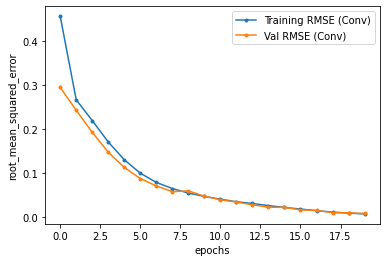

In [144]:
plt.plot(history.history['root_mean_squared_error'], '.-', label='Training RMSE (Conv)')
plt.plot(history.history['val_root_mean_squared_error'], '.-', label='Val RMSE (Conv)')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [145]:
train_predictions = conv_model.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1553/1553 [==============================] - 3s 2ms/step


,Train Predictions,Actuals
0,-1.501072,-1.502865
1,0.162261,0.166181
2,-0.274353,-0.285700
3,0.003068,-0.007415
4,0.706059,0.701682
...,...,...
49660,-1.690557,-1.691774
49661,-1.713215,-1.711435
49662,-1.521964,-1.519250
49663,-1.587232,-1.588064


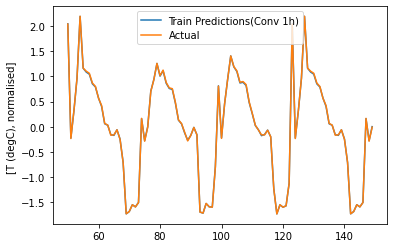

In [146]:
plt.plot(train_results['Train Predictions'][50:150], label='Train Predictions(Conv 1h)')
plt.plot(train_results['Actuals'][50:150], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [147]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

444/444 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,-0.490008,-0.802580
1,1.046742,0.806638
2,-0.218067,-0.229989
3,0.462509,0.451378
4,0.954922,0.945608
...,...,...
14185,-1.556035,-1.566101
14186,-1.139314,-1.117608
14187,1.583405,2.036404
14188,-0.242123,-0.232912


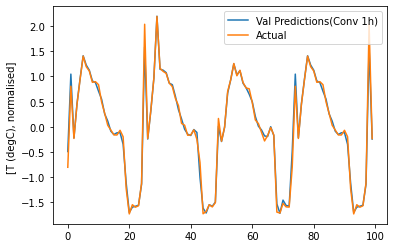

In [148]:
plt.plot(val_results['Val Predictions'][:100], label='Val Predictions(Conv 1h)')
plt.plot(val_results['Actuals'][:100], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [149]:
test_predictions = conv_model.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

222/222 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,0.961616,0.967930
1,2.189769,2.192565
2,1.161936,1.163321
3,1.084947,1.101940
4,1.044116,1.061994
...,...,...
7091,0.030354,0.033062
7092,-0.156701,-0.166750
7093,-0.170261,-0.160109
7094,-0.059854,-0.059672


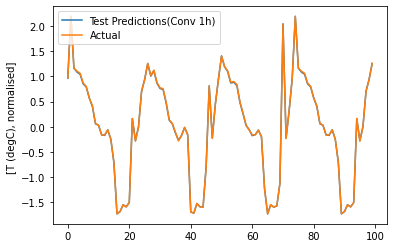

In [150]:
plt.plot(test_results['Test Predictions'][:100], label='Test Predictions(Conv 1h)')
plt.plot(test_results['Actuals'][:100], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [151]:
# LSTM Model

lstm_model = Sequential()
lstm_model.add(InputLayer((5, 1)))
# model1.add(Reshape(target_shape=(5, 1)))
lstm_model.add(LSTM(64))
# lstm_model.add(LSTM(input_shape = (WINDOW_SIZE, 1), return_sequences = True, units = 100))
# lstm_model.add(LSTM(input_shape = (WINDOW_SIZE, 1), units = 100))
lstm_model.add(Dense(8, 'relu'))
lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [152]:
lstm_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [153]:
history = lstm_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
1553/1553 [==============================] - 14s 7ms/step - loss: 0.3822 - root_mean_squared_error: 0.6182 - val_loss: 0.2095 - val_root_mean_squared_error: 0.4577
Epoch 2/20
1553/1553 [==============================] - 10s 7ms/step - loss: 0.1873 - root_mean_squared_error: 0.4328 - val_loss: 0.1693 - val_root_mean_squared_error: 0.4115
Epoch 3/20
1553/1553 [==============================] - 10s 7ms/step - loss: 0.1549 - root_mean_squared_error: 0.3936 - val_loss: 0.1397 - val_root_mean_squared_error: 0.3738
Epoch 4/20
1553/1553 [==============================] - 10s 7ms/step - loss: 0.1220 - root_mean_squared_error: 0.3493 - val_loss: 0.1052 - val_root_mean_squared_error: 0.3243
Epoch 5/20
1553/1553 [==============================] - 10s 7ms/step - loss: 0.0911 - root_mean_squared_error: 0.3019 - val_loss: 0.0787 - val_root_mean_squared_error: 0.2806
Epoch 6/20
1553/1553 [==============================] - 10s 7ms/step - loss: 0.0717 - root_mean_squared_error: 0.2678 - val_l

In [154]:
val_performance['LSTM 1h'] = lstm_model.evaluate(X_val1, y_val1)
performance['LSTM 1h'] = lstm_model.evaluate(X_test1, y_test1)

performance

222/222 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153


{'MLP 1h': [0.00916055403649807, 0.09571078419685364],
 'Convolutional 1h': [7.421489135595039e-05, 0.008614806458353996],
 'LSTM 1h': [0.013290795497596264, 0.1152857095003128]}

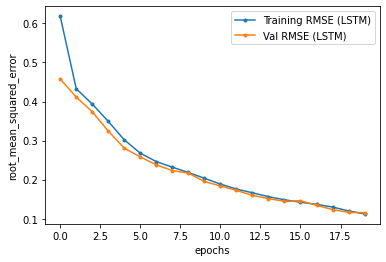

In [155]:
plt.plot(history.history['root_mean_squared_error'], '.-', label='Training RMSE (LSTM)')
plt.plot(history.history['val_root_mean_squared_error'], '.-', label='Val RMSE (LSTM)')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [156]:
val_performance

{'MLP 1h': [0.009186048060655594, 0.09584387391805649],
 'Convolutional 1h': [7.414424908347428e-05, 0.008610705845057964],
 'LSTM 1h': [0.013336661271750927, 0.11548446118831635]}

In [157]:
train_predictions = lstm_model.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1553/1553 [==============================] - 5s 3ms/step


,Train Predictions,Actuals
0,-1.588048,-1.502865
1,-0.254688,0.166181
2,-0.259286,-0.285700
3,0.038787,-0.007415
4,0.723126,0.701682
...,...,...
49660,-1.683239,-1.691774
49661,-1.751522,-1.711435
49662,-1.493452,-1.519250
49663,-1.572785,-1.588064


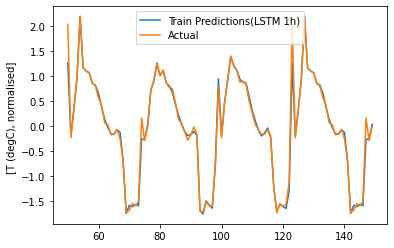

In [158]:
plt.plot(train_results['Train Predictions'][50:150], label='Train Predictions(LSTM 1h)')
plt.plot(train_results['Actuals'][50:150], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [159]:
val_predictions = lstm_model.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

444/444 [==============================] - 1s 3ms/step


,Val Predictions,Actuals
0,-0.723505,-0.802580
1,0.947231,0.806638
2,-0.180490,-0.229989
3,0.484349,0.451378
4,0.914757,0.945608
...,...,...
14185,-1.640704,-1.566101
14186,-1.296005,-1.117608
14187,1.263818,2.036404
14188,-0.185004,-0.232912


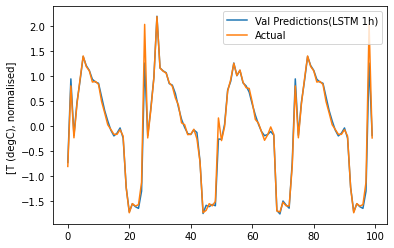

In [160]:
plt.plot(val_results['Val Predictions'][:100], label='Val Predictions(LSTM 1h)')
plt.plot(val_results['Actuals'][:100], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [161]:
test_predictions = lstm_model.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

222/222 [==============================] - 1s 3ms/step


,Test Predictions,Actuals
0,0.975853,0.967930
1,2.199247,2.192565
2,1.165926,1.163321
3,1.107152,1.101940
4,1.071144,1.061994
...,...,...
7091,-0.021306,0.033062
7092,-0.144528,-0.166750
7093,-0.163589,-0.160109
7094,-0.071294,-0.059672


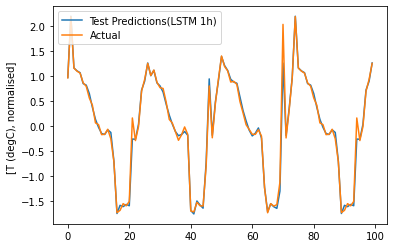

In [162]:
plt.plot(test_results['Test Predictions'][:100], label='Test Predictions(LSTM 1h)')
plt.plot(test_results['Actuals'][:100], label='Actual')
plt.ylabel('[T (degC), normalised] ')
plt.legend()

In [163]:
# trained models

DENSE_MODEL_NAME = 'dense_hour_norm.h5'
CONV_MODEL_NAME = 'conv_hour_norm.h5'
LSTM_MODEL_NAME = 'lstm_hour_norm.h5'

In [164]:
model1.save(DENSE_MODEL_NAME)
conv_model.save(CONV_MODEL_NAME)
lstm_model.save(LSTM_MODEL_NAME)


In [165]:
def get_file_size(file_path):
  """calculates file size of trained model"""
    size = os.path.getsize(file_path)
    return size

In [166]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [167]:
from sklearn.metrics import accuracy_score
from sys import getsizeof

convert_bytes(get_file_size(DENSE_MODEL_NAME), "MB")

File size: 0.017 Megabytes


In [168]:
convert_bytes(get_file_size(CONV_MODEL_NAME), "MB")


File size: 0.181 Megabytes


In [169]:
convert_bytes(get_file_size(LSTM_MODEL_NAME), "MB")


File size: 0.235 Megabytes


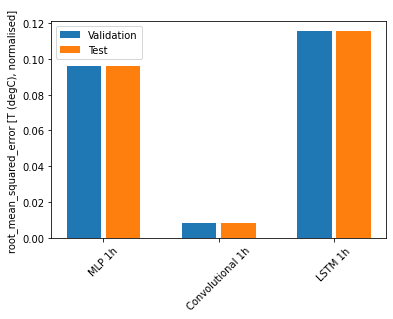

In [170]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'root_mean_squared_error'
metric_index = lstm_model.metrics_names.index('root_mean_squared_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('root_mean_squared_error [T (degC), normalised] ')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [171]:
# uncomment for interger quantization


# def representative_data_gen():
#   for input_value in tf.data.Dataset.from_tensor_slices(X_train1).batch(1).take(100):
#     # Model has only one input so each data point has one element.
#     yield [input_value]

In [172]:
converter = tf.lite.TFLiteConverter.from_keras_model(model1)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
                                        # tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8  # or tf.uint8
# converter.inference_output_type = tf.int8
converter.target_spec.supported_types = [tf.float16]

tflite_model = converter.convert()

# Save the model.
with open('dense_modelr4.tflite', 'wb') as f:
  f.write(tflite_model)

## Conversion to TensorFlow Lite

In [183]:
converter = tf.lite.TFLiteConverter.from_keras_model(conv_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
                                        # tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8  # or tf.uint8
# converter.inference_output_type = tf.int8
# converter.target_spec.supported_types = [tf.float16]

conv_tflite_model = converter.convert()

# Save the model.
with open('conv_modelr4.tflite', 'wb') as f:
  f.write(conv_tflite_model)

In [184]:
converter = tf.lite.TFLiteConverter.from_keras_model(lstm_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
                                        # tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8  # or tf.uint8
# converter.inference_output_type = tf.int8
converter.target_spec.supported_types = [tf.float16]

lstm_tflite_model = converter.convert()

# Save the model.
with open('lstm_modelr4.tflite', 'wb') as f:
  f.write(lstm_tflite_model)

## Converted Model Size

In [185]:
convert_bytes(get_file_size('dense_modelr4.tflite'), "KB")

File size: 3.441 Kilobytes


In [186]:
convert_bytes(get_file_size('conv_modelr4.tflite'), "KB")

File size: 16.297 Kilobytes


In [187]:
convert_bytes(get_file_size('lstm_modelr4.tflite'), "KB")

File size: 44.707 Kilobytes


## Converted Model Analysis

In [188]:
tf.lite.experimental.Analyzer.analyze(model_content=tflite_model)

=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the DEQUANTIZE op takes
tensor #4 as input and produces tensor #5 as output.

Subgraph#0 main(T#0) -> [T#10]
  Op#0 DEQUANTIZE(T#4) -> [T#5]
  Op#1 DEQUANTIZE(T#3) -> [T#6]
  Op#2 DEQUANTIZE(T#2) -> [T#7]
  Op#3 DEQUANTIZE(T#1) -> [T#8]
  Op#4 FULLY_CONNECTED(T#0, T#6, T#7) -> [T#9]
  Op#5 FULLY_CONNECTED(T#9, T#5, T#8) -> [T#10]

Tensors of Subgraph#0
  T#0(serving_default_dense_8_input:0) shape_signature:[-1, 5], type:FLOAT32
  T#1(sequential_4/dense_9/BiasAdd/ReadVariableOp) shape:[1], type:FLOAT16 RO 2 bytes
  T#2(sequential_4/dense_8/BiasAdd/ReadVariableOp) shape:[100], type:FLOAT16 RO 200 bytes
  T#3(sequential_4/dense_8/MatMul) shape:[100, 5], type:FLOAT16 RO 1000 bytes
  T#4(sequential_4/dense_9/MatMul) shape:[1, 100], type:FLOAT16 RO 200 bytes
  T#5(sequential_4/dense_9/MatMul1) shape:[1, 100], type:FLOAT32
  T#6(

In [189]:
interpreter = tf.lite.Interpreter(model_path = "dense_modelr4.tflite")

interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()[0]
print("input shape: ", input_details[0]["shape"])
print("input type:", input_details[0]["dtype"])
print("output shape: ", output_details["shape"])
print("output type:", output_details["dtype"])

input shape:  [1 5]
input type: <class 'numpy.float32'>
output shape:  [1 1]
output type: <class 'numpy.float32'>


In [ ]:
input_shape = input_details[0]['shape']
# input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
input_data = np.array(X_test1, dtype=np.float32)
interpreter.set_tensor(input_details[0], input_data)

interpreter.invoke()

In [ ]:
input_shape = interpreter.get_tensor(input_details[0]['index'])

In [ ]:
input_data

In [ ]:
output_data = interpreter.get_tensor(output_details['index'])

In [ ]:
output_data

In [ ]:
prediction_classes = np.argmax(output_data, axis=1)


In [ ]:
acc = accuracy_score(prediction_classes, y_test1)

In [ ]:
interpreter.get_input_details()

In [ ]:
tf.dtypes.cast(input_details[0]['shape_signature'], dtype=tf.int8)
input_details[0]['shape_signature']

In [ ]:
tf.lite.experimental.Analyzer.analyze(model_content=conv_tflite_model)

In [ ]:
tf.lite.experimental.Analyzer.analyze(model_content=lstm_tflite_model)